$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:2}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [31]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000,4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  eig_value=np.linalg.eigvals(A)
  return max(eig_value)/min(eig_value)

In [32]:
A=evalh(np.array([1,2]))

In [33]:
find_condition_number(A)

1504.0160463434236

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question:4}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$ The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling can be written as:-

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}\ \ \ $
Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function for $k^{th}$ iteration.

$\textbf{Question:5}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$

$\mathbf{D^k}$ is a diagonal matrix whose diagonal entries are the inverse of the second partial derivatives.Hence our $D^k$ will be:

$$\mathbf{D^k}=\begin{bmatrix}
\frac{1}{3000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix}$$

Write code to find the matrix $\mathbf{D}^k$. 

In [34]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  a11=1/3000
  a12=0
  a21=0
  a22=1/2
  return np.array([[a11,a12],[a21,a22]])
  

In [35]:
compute_D_k(np.array([1,1]))

array([[3.33333333e-04, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e-01]])

In [36]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it
  return 1500*(x[0]**2)+4*x[0]*x[1]+x[1]**2 
  


In [37]:
evalf(np.array([1,1]))

1505

In [38]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([3000*x[0]+4*x[1],4*x[0]+2*x[1]])
  

In [39]:
evalg(np.array([1,1])).shape

(2,)

In [40]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  step_length=(np.dot(gradf.T,gradf)) / (np.matmul(np.matmul(gradf,2*A),gradf)) 
  
  return step_length
  

In [41]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  #Complete the code 
  alpha = alpha_start
  p=rho
  y=gamma
  #implement the backtracking line search
  while evalf(x+alpha*(-gradf)) > evalf(x)-y*alpha*np.dot((gradf.T),gradf):
    alpha=p*alpha


  #print('final step length:',alpha)
  return alpha
  
  

In [42]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  p = - gradf
  D_k = compute_D_k(x)
  r=rho
  y=gamma
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + y*alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha=alpha*r
  return alpha

  
  
  #Complete the code 

In [43]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [44]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  A=np.array([[1500,2],[2,1]])

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,k  


In [45]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  A = np.array([[1500, 2], [2, 1]])
  D_k = compute_D_k(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k
  #Complete the code  
  #Complete the code   

$\textbf{Question:7}$ 



In [46]:
my_start_x=np.array([4.,4.])
my_tol=1e-5
#check gradient descent with exact line search 
x_opt,iterations = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(f'Value of optimizer for exact step length= {x_opt}\nMinimum value is= {evalf(x_opt)}\nNumber of iterations= {iterations}\n ')
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}\n")
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking scaled line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}\n")

Value of optimizer for exact step length= [-2.32108719e-09  1.73908326e-06]
Minimum value is= 3.0163454977772667e-12
Number of iterations= 5
 
Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
Value of optimizer for Backtracking line search =[-7.41280132e-09  4.58747524e-06] 
Minimum value is= 2.0991329363516383e-11
Number of iterations are= 8194

Value of optimizer for Backtracking scaled line search =[ 7.57844280e-11 -3.79259259e-08] 
Minimum value is= 1.43549399821784e-15
Number of iterations are= 9



$\textbf{Question:8}$ 

In [47]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [48]:
#check gradient descent with exact line search 
x_opt,iterations = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(f'Value of optimizer for exact step length= {x_opt}\nMinimum value is= {evalf(x_opt)}\nNumber of iterations= {iterations} ')

Value of optimizer for exact step length= [-7.44595231e-16  4.61544291e-13]
Minimum value is= 2.12480110780353e-25
Number of iterations= 14075 


In [49]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}")

Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
Value of optimizer for Backtracking line search =[-4.78532202e-16  4.53575301e-13] 
Minimum value is= 2.0520584176089396e-25
Number of iterations are= 21985


In [50]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x_opt_bls,iterations = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho,gamma)
print(f"Value of optimizer for Backtracking scaled line search ={x_opt_bls} \nMinimum value is= {evalf(x_opt_bls)}\nNumber of iterations are= {iterations}")

Value of optimizer for Backtracking scaled line search =[-2.31674405e-18  9.60515434e-16] 
Minimum value is= 9.217397790469283e-31
Number of iterations are= 16


I can observe that the backtracking algorithm with scaling is taking only 16 iterations to terminate while backtracking without scaling is taking 21985 interations which is very high as compared to backtracking with scaling algorithm. and the exact step length algorithm is taking 14075 iterations to terminate which is also very high as compared to backtracking with scaling. hence in this case backtracking with scaling is a faster approach.
In each algorithm the value of optimizer is approaching to $[0,0]$ and the optimum value is approaching to $0$.

$\textbf{Question:9}$ 

In [51]:
my_start_x=np.array([1.,4000.])
my_tol=1e-12
list_of_alpha=[1.,0.9,0.75,0.6,0.5, 0.4, 0.25, 0.1, 0.01]
opt_with_scaling=[]
opt_without_scaling=[]
iterations_scaling=[]
iterations_without_scaling=[]
for alpha in list_of_alpha:
  print(f'For alpha={alpha}')
  print("For backtracking with scaling process:")
  opt_bt_scale,k=find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha,0.5,0.5)
  print(f"Value of optimizer ={opt_bt_scale} \nMinimum value is= {evalf(opt_bt_scale)}\nNumber of iterations are= {k}\n")

  opt_with_scaling.append(opt_bt_scale)
  iterations_scaling.append(k)
  print("For backtracking without scaling process:")
  opt_bt,k1=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,0.5,0.5)
  print(f"Value of optimizer ={opt_bt} \nMinimum value is= {evalf(opt_bt)}\nNumber of iterations are= {k1}\n")
  opt_without_scaling.append(opt_bt)
  iterations_without_scaling.append(k1)

For alpha=1.0
For backtracking with scaling process:
Value of optimizer =[-2.31674405e-18  9.60515434e-16] 
Minimum value is= 9.217397790469283e-31
Number of iterations are= 16

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
Value of optimizer =[-4.78532202e-16  4.53575301e-13] 
Minimum value is= 2.0520584176089396e-25
Number of iterations are= 21985

For alpha=0.9
For backtracking with scaling process:
Value of optimizer =[-1.54825431e-16  5.99636318e-15] 
Minimum value is= 6.819918471923904e-29
Number of iterations are= 21

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
Value of optimizer =[-5.48799355e-16  4.71515450e-13] 
Minimum value is= 2.2174352131747877e-25
Number of iterations are= 15941

For alpha=0.75
For backtracking with scaling process:
Value of optimizer =[-2.78273450e-16  1.07784868e-14] 
Minimum value is= 2.203324807217381e-28
Number of iterations 

In [52]:
from tabulate import tabulate
head=['alpha',"optimizer with scaling","optimizer without scaling","No. of Iterations with scaling","No. of Iterations without scaling","Optimum Value with sacling","Optimum value without scaling"]

In [53]:
my_data=[[list_of_alpha[i],opt_with_scaling[i],opt_without_scaling[i],iterations_scaling[i],iterations_without_scaling[i],evalf(opt_with_scaling[i]),evalf(opt_without_scaling[i])] for i in range(len(list_of_alpha))]

In [54]:
print(tabulate(my_data, headers=head, tablefmt="grid"))

+---------+-----------------------------------+-----------------------------------+----------------------------------+-------------------------------------+------------------------------+---------------------------------+
|   alpha | optimizer with scaling            | optimizer without scaling         |   No. of Iterations with scaling |   No. of Iterations without scaling |   Optimum Value with sacling |   Optimum value without scaling |
+=========+===================================+===================================+==================================+=====================================+==============================+=================================+
|    1    | [-2.31674405e-18  9.60515434e-16] | [-4.78532202e-16  4.53575301e-13] |                               16 |                               21985 |                  9.2174e-31  |                     2.05206e-25 |
+---------+-----------------------------------+-----------------------------------+-----------------------------

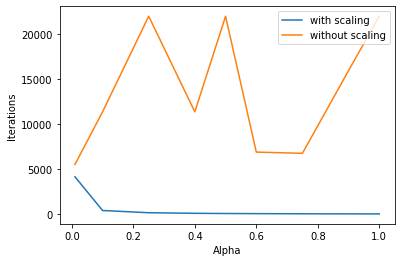

In [55]:
import matplotlib.pyplot as plt
plt.plot(list_of_alpha,iterations_scaling,label="with scaling")
plt.plot(list_of_alpha,iterations_without_scaling,label="without scaling")
plt.xlabel("Alpha")
plt.ylabel("Iterations")
plt.legend(loc="upper right")


In the above plot and the table, we can see that no. of iteration for backtracking with scaling algorithm is increasing as alpha decreases.If we decrease the value of alpha from 1 to 0.01 the no. of iteration increasea from 21 to 4146.

and for backtracking without scaling algorithm we can't see any pattern as we decrease the value of alpha from 1 to 0.01. and we observe that for each value of alpha the no. of iterations taken by backtracking without scaling algorithm is very high as compared to backtracking with scaling algorithm.

The value of optimizer approaching to $[0,0]$ for each alpha for both algorithms and the optimum value is also approaching to 0 for both algorithms


$\textbf{Question:10}$ 

In [56]:
my_start_x=np.array([1.,4000.])
my_tol=1e-12
list_of_rho=[0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
opt_with_scaling=[]
opt_without_scaling=[]
iterations_scaling=[]
iterations_without_scaling=[]
for r in list_of_rho:
  print(f'For rho = {r}')
  print("For backtracking with scaling process:")
  opt_bt_scale,k=find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.,r,0.5)
  print(f"Value of optimizer ={opt_bt_scale} \nMinimum value is= {evalf(opt_bt_scale)}\nNumber of iterations are= {k}\n")

  opt_with_scaling.append(opt_bt_scale)
  iterations_scaling.append(k)
  print("For backtracking without scaling process:")
  opt_bt,k1=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,1.,r,0.5)
  print(f"Value of optimizer ={opt_bt} \nMinimum value is= {evalf(opt_bt)}\nNumber of iterations are= {k1}\n")
  opt_without_scaling.append(opt_bt)
  iterations_without_scaling.append(k1)

For rho = 0.9
For backtracking with scaling process:
Value of optimizer =[-1.90920422e-16  3.38018326e-15] 
Minimum value is= 6.352016622002106e-29
Number of iterations are= 14

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 1.0 rho: 0.9  gamma: 0.5
Value of optimizer =[-6.44686128e-16  4.90962904e-13] 
Minimum value is= 2.404019351870065e-25
Number of iterations are= 127

For rho = 0.8
For backtracking with scaling process:
Value of optimizer =[-3.89959677e-18  7.65599523e-16] 
Minimum value is= 5.970107943515186e-31
Number of iterations are= 15

For backtracking without scaling process:
Params for Backtracking LS: alpha start: 1.0 rho: 0.8  gamma: 0.5
Value of optimizer =[-6.99968590e-16  4.40149178e-13] 
Minimum value is= 1.932338703071826e-25
Number of iterations are= 1471

For rho = 0.75
For backtracking with scaling process:
Value of optimizer =[-3.59593964e-18  9.57478862e-16] 
Minimum value is= 9.223897999650174e-31
Number of iterations are= 

In [57]:
head=['rho ',"optimizer with scaling","optimizer without scaling","No. of Iterations with scaling","No. of Iterations without scaling","Optimum Value with sacling","Optimum value without scaling"]

In [58]:
my_data=[[list_of_rho[i],opt_with_scaling[i],opt_without_scaling[i],iterations_scaling[i],iterations_without_scaling[i],evalf(opt_with_scaling[i]),evalf(opt_without_scaling[i])] for i in range(len(list_of_rho))]

In [59]:
print(tabulate(my_data, headers=head, tablefmt="grid"))

+--------+-----------------------------------+-----------------------------------+----------------------------------+-------------------------------------+------------------------------+---------------------------------+
|   rho  | optimizer with scaling            | optimizer without scaling         |   No. of Iterations with scaling |   No. of Iterations without scaling |   Optimum Value with sacling |   Optimum value without scaling |
+========+===================================+===================================+==================================+=====================================+==============================+=================================+
|   0.9  | [-1.90920422e-16  3.38018326e-15] | [-6.44686128e-16  4.90962904e-13] |                               14 |                                 127 |                  6.35202e-29 |                     2.40402e-25 |
+--------+-----------------------------------+-----------------------------------+----------------------------------

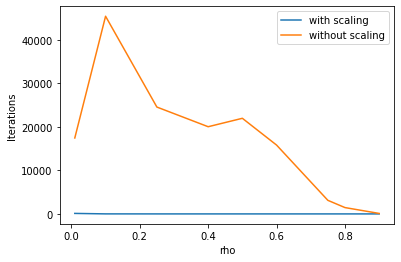

In [60]:
plt.plot(list_of_rho,iterations_scaling,label="with scaling")
plt.plot(list_of_rho,iterations_without_scaling,label="without scaling")
plt.xlabel("rho")
plt.ylabel("Iterations")
plt.legend(loc="upper right")


In the above table and plot, we can see that no. of iterations for backtracking with scaling algorithm are increasing very slowly as we decrease the value of rho. and no of iterations for backtracking without scaling increases as we decreaser the value of rho from 0.9 to 0.1 then it decreases when we decrease the value of rho from 0.1 to 0.01.

The value of optimizer is $[0,0]$(approximately),and the optimum value is also 0(approximately) for both algorithms.